2. A xor b = (A or B) and (not A or not B)

3. Regular Perceptron does not outputs probabilities, rather it outputs hard values. Perceptron is also unable to solve complex problems because it is a linear algorithm. It can only converge when the dataset is linearly separable. To make perceptron equivalent to a Logistic Regression classifier, it must be have a logisitc activation function (or softmax if there are multiple neurons) and trained with Gradient Descent to minimize the cost function.

4. The logistic (sigmoid) activation function was key to the first MLPs because it improves the performance of Gradient Descent due to being continuous, while the classic activation function was a step function (had derivatives of 0) and did not enable Gradient Descent to "descend" because there is no slope.

5. The three popular activation functions:
    - Sigmoid (logistic)
    - Hypertangent
    - Rectified Linear Unit (ReLU)
    - Softmax

6. 
    - The shape of the input matrix is N * 10 (N instances; 10 features).
    - The shape of the hidden layers weight vector is 50x1. The bias vector has the same shape
    - The shape of the output layer's weight vector is 3x1. The bias vector has the same shape
    - The shape of the network's output matrix Y is 3x1. One for each output neuron (class)
    - ~Y = max(Wh*max(W0*X+B0)+Bh, 0)~ 
        - Textbook answer: Y = max(W0*max(Wh*X + Bh) + B0, 0)
            - it is a chain of functions, with the complexity increasing at every layer. The chaining begins from the first hidden layer's activation function to the output layer's

7. To classify email into smap or ham, I need one output neuron. The activation function should be a logistic function (to normalize the output between 0 and 1 and use it as a probability). For MNIST, I would need 10 neurons in the output layer, and the activation function should be the softmax activation function to handle one probability per class. To predict housing prices, there would need to be one output neuron, and no output activation function to outputa specific value (this is done in regression problems)

8. - Backpropagation works by (in order):
    1. feeding the input into the network as batches
    2. computing the outputs of each layer until the output layer
    3. computes the loss of the network by comparing its output with the actual/desired output
    4. goes through the network in reverse and calculates how much each output (neuron) connection contributed to the error by using the *chain rule*
    5. then measures how much each connection in the layer below contributed to the error by using the chain rule, and repeats until the input layer
        - it works by propagating the error gradient backward through the network to compute the error gradient across all connection weights
    6. then it does a gradient descent step to change the connection weights by using the error gradients it computed
 - Reverse-mode autodiff is only a part of backprogation and it used to automatically differentiate the (activation?) functions
   
books answer:
- Backprop is a technique to train ANNs. It computes the gradients of the cost function with regard to every model parameter (all weights and biases), then performs a gradient descent step using these gradients. This step is usually perfomed thousands or millions of times, using many training batches, until the model parameters converge to the values that minimize the cost function. 
- Backprop uses reverse-mode autodiff to compute the gradients. Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once.
- Reverse-mode autodiff is just a part of backpropagation that is used to compute gradients efficiently (the process of training the whole NN).

9. - Hyperparameters that can be tweak in a basic MLP
    - \# of hidden layers
    - \# of neurons per layer
    - learning rate
    - activation function
    - epochs
    - batch size
    - \# of operations
- To combat overfitting, use early stopping and use other regularization techniques, reduce the number of hidden layers, and reduce the number of neurons per layer

10.

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)
x_test =  x_test
y_test =  y_test

import numpy as np

x_train = np.true_divide(x_train, 255.0)
x_val = np.true_divide(x_val, 255.0)
x_test = np.true_divide(x_test, 255.0)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax") # multiclass classification problem. mutually exclusive classes
])

alpha = 1e-3

model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=alpha), metrics=["accuracy"])

In [4]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), verbose=1)

Epoch 1/30
1407/1407 [==============================] - 2s 1ms/step - loss: 2.2858 - accuracy: 0.1544 - val_loss: 2.2005 - val_accuracy: 0.2677
Epoch 2/30
1407/1407 [==============================] - 1s 832us/step - loss: 2.1382 - accuracy: 0.3044 - val_loss: 1.8336 - val_accuracy: 0.5273
Epoch 3/30
1407/1407 [==============================] - 1s 842us/step - loss: 1.6897 - accuracy: 0.5824 - val_loss: 1.2060 - val_accuracy: 0.6790
Epoch 4/30
1407/1407 [==============================] - 1s 850us/step - loss: 1.0733 - accuracy: 0.7053 - val_loss: 0.8010 - val_accuracy: 0.7556
Epoch 5/30
1407/1407 [==============================] - 1s 860us/step - loss: 0.7500 - accuracy: 0.7766 - val_loss: 0.6412 - val_accuracy: 0.8073
Epoch 6/30
1407/1407 [==============================] - 1s 842us/step - loss: 0.6090 - accuracy: 0.8191 - val_loss: 0.5470 - val_accuracy: 0.8384
Epoch 7/30
1407/1407 [==============================] - 1s 836us/step - loss: 0.5373 - accuracy: 0.8443 - val_loss: 0.4798 - v

In [5]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(x_test)
accuracy_score(y_test, y_pred)

/Users/jameseroy/ml/env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9394

In [23]:
def build_model(n_neurons=10, n_hidden=1, learning_rate=1e-3, input_shape=x_train.shape[1:]):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=learning_rate), metrics=["accuracy"])
    return model

In [24]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

mnist_clf = KerasClassifier(build_model)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import reciprocal

params = {
    'n_hidden': np.arange(4, 8).tolist(),
    'n_neurons': np.arange(50, 100).tolist(),
}

rand_searcher = RandomizedSearchCV(mnist_clf, params, n_iter=3, cv=2, verbose=2)
rand_searcher.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[EarlyStopping(patience=10)], verbose=0)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
704/704 [==============================] - 1s 880us/step - loss: 0.4177 - accuracy: 0.8749
[CV] END ...........................n_hidden=7, n_neurons=78; total time=  15.3s
704/704 [==============================] - 1s 863us/step - loss: 0.4189 - accuracy: 0.8711
[CV] END ...........................n_hidden=7, n_neurons=78; total time=  15.1s
704/704 [==============================] - 1s 897us/step - loss: 0.3422 - accuracy: 0.9001
[CV] END ...........................n_hidden=6, n_neurons=99; total time=  16.4s
704/704 [==============================] - 1s 1ms/step - loss: 0.3874 - accuracy: 0.8874
[CV] END ...........................n_hidden=6, n_neurons=99; total time=  16.1s
704/704 [==============================] - 1s 819us/step - loss: 0.3695 - accuracy: 0.8938
[CV] END ...........................n_hidden=5, n_neurons=68; total time=  13.9s
704/704 [==============================] - 1s 837us/step - loss: 0.3373 - accuracy:

RandomizedSearchCV(cv=2,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdf49e932e0>,
                   n_iter=3,
                   param_distributions={'n_hidden': [4, 5, 6, 7],
                                        'n_neurons': [50, 51, 52, 53, 54, 55,
                                                      56, 57, 58, 59, 60, 61,
                                                      62, 63, 64, 65, 66, 67,
                                                      68, 69, 70, 71, 72, 73,
                                                      74, 75, 76, 77, 78, 79, ...]},
                   verbose=2)

In [51]:
best_params = rand_searcher.best_params_
print(best_params)

{'n_neurons': 68, 'n_hidden': 5}


In [33]:
'''
learning_rate = 1e-3

import math

learning_rates = [learning_rate]
losses = []
while learning_rate < 2:
    learning_rates.append(learning_rate)
    model = build_model(learning_rate=learning_rate, n_neurons=best_params['n_neurons'], n_hidden=best_params['n_hidden'])
    model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)
    loss = model.evaluate(x_test, y_test)
    losses.append(loss)
    learning_rate *= math.exp(math.log(10e6) / 500)
'''

"\nlearning_rate = 1e-3\n\nimport math\n\nlearning_rates = [learning_rate]\nlosses = []\nwhile learning_rate < 2:\n    learning_rates.append(learning_rate)\n    model = build_model(learning_rate=learning_rate, n_neurons=best_params['n_neurons'], n_hidden=best_params['n_hidden'])\n    model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)\n    loss = model.evaluate(x_test, y_test)\n    losses.append(loss)\n    learning_rate *= math.exp(math.log(10e6) / 500)\n"

In [90]:
from tensorflow.keras import backend
from tensorflow.keras.callbacks import Callback

K = backend

class ExponentialLearningRate(Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [91]:
backend.clear_session()

In [92]:
expon_lr_cb = ExponentialLearningRate(factor=1.005);

model = build_model(learning_rate=learning_rate, n_neurons=200, n_hidden=best_params['n_hidden'])
model.fit(x_train, y_train, epochs=1, validation_data=(x_val, y_val), callbacks=[expon_lr_cb])

1407/1407 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.3577 - val_loss: nan - val_accuracy: 0.1001


Text(0, 0.5, 'Loss')

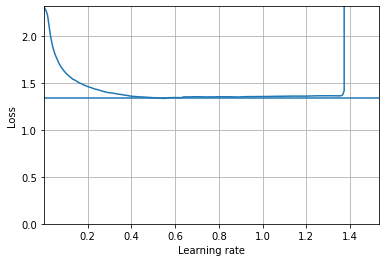

In [102]:
import matplotlib.pyplot as plt 

plt.plot(expon_lr_cb.rates, expon_lr_cb.losses)
# plt.gca().set_xscale('log')
plt.hlines(min(expon_lr_cb.losses), min(expon_lr_cb.rates), max(expon_lr_cb.rates))
plt.axis([min(expon_lr_cb.rates), max(expon_lr_cb.rates), 0, expon_lr_cb.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [119]:
# the optimal learning rate is usually 10x less than the lr where the loss starts climbing. Here the lr starts climbing around lr=1.37
model = build_model(learning_rate=1.37e-1, n_neurons=200, n_hidden=best_params['n_hidden'])

In [120]:
import os

root_logdir = os.path.join(os.curdir, 'logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [121]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

tensorboard_cb = TensorBoard(get_run_logdir())
earlystopping_cb = EarlyStopping(patience=20)

model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[tensorboard_cb, earlystopping_cb])

Epoch 1/60
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6637 - accuracy: 0.7874 - val_loss: 0.1566 - val_accuracy: 0.9523
Epoch 2/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1350 - accuracy: 0.9599 - val_loss: 0.6273 - val_accuracy: 0.8564
Epoch 3/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0954 - accuracy: 0.9710 - val_loss: 0.1052 - val_accuracy: 0.9675
Epoch 4/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0989 - val_accuracy: 0.9701
Epoch 5/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0569 - accuracy: 0.9814 - val_loss: 0.0927 - val_accuracy: 0.9725
Epoch 6/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0871 - val_accuracy: 0.9760
Epoch 7/60
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0968 - val_accuracy:

In [122]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 679us/step - loss: 0.0994 - accuracy: 0.9838


[0.09943719208240509, 0.9837999939918518]

In [123]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
            
list_files("./logs")

logs/
    run_2021_04_25-17_51_46/
        train/
            events.out.tfevents.1619391106.Jamess-MacBook-Pro-2.local.profile-empty
            events.out.tfevents.1619391106.Jamess-MacBook-Pro-2.local.11817.5411926.v2
            plugins/
                profile/
                    2021_04_25_17_51_46/
                        Jamess-MacBook-Pro-2.local.trace.json.gz
                        Jamess-MacBook-Pro-2.local.xplane.pb
                        Jamess-MacBook-Pro-2.local.overview_page.pb
                        Jamess-MacBook-Pro-2.local.input_pipeline.pb
                        Jamess-MacBook-Pro-2.local.memory_profile.json.gz
                        Jamess-MacBook-Pro-2.local.kernel_stats.pb
                        Jamess-MacBook-Pro-2.local.tensorflow_stats.pb
        validation/
            events.out.tfevents.1619391109.Jamess-MacBook-Pro-2.local.11817.5415244.v2
    run_2021_04_25-16_55_49/
        train/
            events.out.tfevents.1619387749.Jamess-MacBook-Pro-2.lo